In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
dataset = pd.read_csv("ipl.csv")

In [448]:
pd.set_option("display.max_columns",None)
dataset

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [449]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


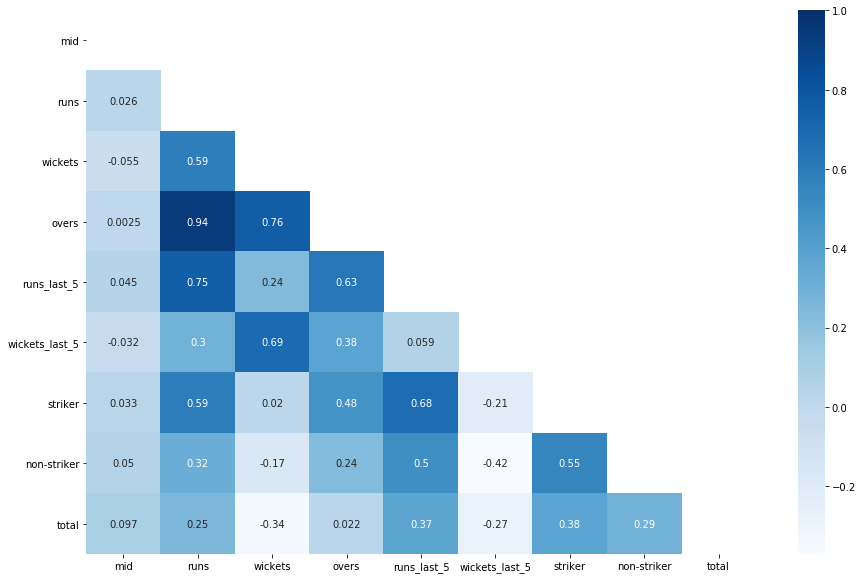

In [450]:
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),mask=mask, annot=True, cmap="Blues", robust=True)

In [451]:
dataset[dataset.overs.values==0].count()

mid               37
date              37
venue             37
bat_team          37
bowl_team         37
batsman           37
bowler            37
runs              37
wickets           37
overs             37
runs_last_5       37
wickets_last_5    37
striker           37
non-striker       37
total             37
dtype: int64

In [452]:
# dataset.drop(index=dataset[dataset.overs==0].index, axis=0, inplace=True)
# dataset["strike_rate"] = dataset["overs"].values
# dataset["strike_rate"]=dataset["runs"]/dataset["overs"]
# dataset.drop(["overs"], axis=1, inplace=True)

In [453]:
dataset.drop(["mid","batsman","bowler"], axis=1, inplace=True)

In [454]:
from datetime import datetime
dataset["date"]=dataset["date"].apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))

In [455]:
dataset.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [456]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [457]:
dataset = dataset[dataset.bat_team.isin(consistent_teams) & dataset.bowl_team.isin(consistent_teams)]

In [458]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [459]:
dataset.columns.values

array(['date', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'striker', 'non-striker', 'total',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium,

In [463]:
dataset = dataset[[ 'date',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera',
       'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       "venue_St George's Park", 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park', 'venue_Wankhede Stadium',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
        'overs', 'runs', 'wickets', 'runs_last_5',
       'wickets_last_5', 'striker', 'non-striker', 'total']]

In [464]:
dataset.head()

,date,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_Kingsmead,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,venue_New Wanderers Stadium,venue_Newlands,venue_OUTsurance Oval,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,total
0,2008-04-18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.1,1,0,1,0,0,0,222
1,2008-04-18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.2,1,0,1,0,0,0,222
2,2008-04-18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.2,2,0,2,0,0,0,222
3,2008-04-18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.3,2,0,2,0,0,0,222
4,2008-04-18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.4,2,0,2,0,0,0,222


In [465]:
X_train = dataset.drop("total",axis=1)[(dataset.date.dt.year<2017) & (dataset.overs>5)]
X_test = dataset.drop("total",axis=1)[(dataset.date.dt.year==2017) & (dataset.overs>5)]

In [466]:
y_train = dataset[(dataset.date.dt.year<2017) & (dataset.overs>5)]["total"].values
y_test = dataset[(dataset.date.dt.year==2017)& (dataset.overs>5)]["total"].values

In [467]:
X_train.drop("date", axis=1, inplace=True)
X_test.drop("date", axis=1, inplace=True)

In [468]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.7411056546418064

In [469]:
from sklearn import metrics
prediction = lin_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.11666468352831
MSE: 262.31295883041656
RMSE: 16.19607850161318


In [470]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param = {"alpha": [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,100]}
ridge_reg = GridSearchCV(estimator=ridge, param_grid=param,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)

/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.27637e-23): result may not be accurate.
  overwrite_a=True).T
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31258e-23): result may not be accurate.
  overwrite_a=True).T
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2908e-23): result may not be accurate.
  overwrite_a=True).T
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28163e-23): result may not be accurate.
  overwrite_a=True).T
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matr

-268.52876173801593

In [471]:
prediction = ridge_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

MAE: 12.291400302881689
MSE: 268.52876173801593
RMSE: 16.38684721775412
{'alpha': 100}
-336.22978794581184


In [472]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param = {"alpha": [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,100]}
lasso_reg = GridSearchCV(estimator=lasso, param_grid=param,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4322330.683465825, tolerance: 2528.7619405923406
  positive)
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4199993.134062977, tolerance: 2545.6442729529654
  positive)
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4384714.908577615, tolerance: 2666.746567247386
  positive)
/Users/subodhjain/opt/anaconda3/envs/tf-2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: 

-262.7336591360314

In [473]:
prediction = ridge_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

MAE: 12.291400302881689
MSE: 268.52876173801593
RMSE: 16.38684721775412
{'alpha': 100}
-336.22978794581184


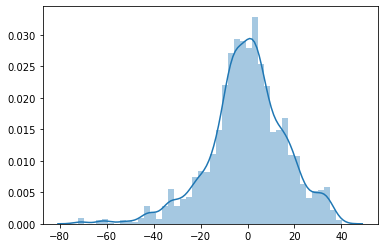

In [474]:
sns.distplot(y_test-prediction)